In [1]:
import pandas as pd

# Load the comments dataset
df_comments = pd.read_csv('carbon_credits_comments_new.csv')

# Display the first few rows of the dataset to ensure it loaded correctly
print(df_comments.head())

                                            Comments        Date
0  Honestly, I see these stories and I'm pretty m...  09/07/2022
1  Fossil fuel industry loves the carbon credit. ...  09/07/2022
2                            What’s a carbon credit?  09/07/2022
3  Yet another example of how carbon credits are ...  09/07/2022
4   BP and exploitation. Name a more consistent duo.  09/07/2022


In [2]:
pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------------ -------------------------- 41.0/126.0 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score for each comment
def get_sentiment(comment):
    sentiment_score = analyzer.polarity_scores(comment)
    return sentiment_score['compound']

# Apply the function to each comment and create a new 'Sentiment' column
df_comments['Sentiment'] = df_comments['Comments'].apply(get_sentiment)

# Display the updated dataframe
print(df_comments.head())

                                            Comments        Date  Sentiment
0  Honestly, I see these stories and I'm pretty m...  09/07/2022    -0.5682
1  Fossil fuel industry loves the carbon credit. ...  09/07/2022     0.8126
2                            What’s a carbon credit?  09/07/2022     0.3818
3  Yet another example of how carbon credits are ...  09/07/2022    -0.2500
4   BP and exploitation. Name a more consistent duo.  09/07/2022     0.0000


In [4]:
# Check for missing values in the dataset
print("Missing values in each column:")
print(df_comments.isnull().sum())

# Drop rows with missing values (if any)
df_comments.dropna(inplace=True)

# Display the dataset after removing missing values
print("\nDataset after removing missing values:")
print(df_comments.head())

Missing values in each column:
Comments     0
Date         0
Sentiment    0
dtype: int64

Dataset after removing missing values:
                                            Comments        Date  Sentiment
0  Honestly, I see these stories and I'm pretty m...  09/07/2022    -0.5682
1  Fossil fuel industry loves the carbon credit. ...  09/07/2022     0.8126
2                            What’s a carbon credit?  09/07/2022     0.3818
3  Yet another example of how carbon credits are ...  09/07/2022    -0.2500
4   BP and exploitation. Name a more consistent duo.  09/07/2022     0.0000


In [17]:
# Aggregate sentiment scores by date (mean sentiment per day)
df_sentiment_aggregated = df_comments.groupby('Date').agg({'Sentiment': 'mean'}).reset_index()

# Display the aggregated sentiment scores by date
print(df_sentiment_aggregated.head(100))

         Date  Sentiment
0  2020-01-03   0.040799
1  2020-01-04  -0.100278
2  2020-01-06  -0.153100
3  2020-01-09  -0.216823
4  2020-01-10  -0.063384
..        ...        ...
95 2020-10-26   0.953600
96 2020-10-27   0.913800
97 2020-11-07   0.116632
98 2020-11-08   0.005214
99 2020-11-09   0.089493

[100 rows x 2 columns]


In [41]:
# Load the final merged data
final_data = pd.read_csv('final_merged_data.csv')

# Display the first few rows to ensure it's loaded correctly
print(final_data.head())

         Date    Low   High   Open  DailyChange  Price_MA_7  \
0  2020-01-02  24.90  24.90  24.90    -2.352941   24.961429   
1  2020-01-03  25.34  25.37  25.34     3.071948   24.927143   
2  2020-01-06  24.70  24.96  24.95    -1.276935   24.765714   
3  2020-01-07  24.59  24.85  24.59     1.869919   24.808571   
4  2020-01-08  24.57  24.88  24.88    -2.380952   24.852857   

   Price_EUR(Quartly Crude Oil Prices)  Inflation_Rates(%)  \
0                               45.243                0.99   
1                               45.243                0.99   
2                               45.243                0.99   
3                               45.243                0.99   
4                               45.243                0.99   

   GDP_Growth_Rate(Annual Average %)  Unemployment_Rate(Annual Average %)  
0                              -10.4                                  6.6  
1                              -10.4                                  6.6  
2                   

In [42]:
# Convert 'Date' column in df_comments to datetime format (assuming format like 'dd/mm/yyyy')
df_sentiment_aggregated['Date'] = pd.to_datetime(df_sentiment_aggregated['Date'], format="%d/%m/%Y", errors='coerce')

# Convert 'Date' column in final_data to datetime format (assuming format like 'yyyy-mm-dd')
final_data['Date'] = pd.to_datetime(final_data['Date'], format="%Y-%m-%d", errors='coerce')

# Display the updated data to ensure date conversion was successful
print(df_sentiment_aggregated.head())
print(final_data.head())

        Date  Sentiment
0 2020-01-03   0.040799
1 2020-01-04  -0.100278
2 2020-01-06  -0.153100
3 2020-01-09  -0.216823
4 2020-01-10  -0.063384
        Date    Low   High   Open  DailyChange  Price_MA_7  \
0 2020-01-02  24.90  24.90  24.90    -2.352941   24.961429   
1 2020-01-03  25.34  25.37  25.34     3.071948   24.927143   
2 2020-01-06  24.70  24.96  24.95    -1.276935   24.765714   
3 2020-01-07  24.59  24.85  24.59     1.869919   24.808571   
4 2020-01-08  24.57  24.88  24.88    -2.380952   24.852857   

   Price_EUR(Quartly Crude Oil Prices)  Inflation_Rates(%)  \
0                               45.243                0.99   
1                               45.243                0.99   
2                               45.243                0.99   
3                               45.243                0.99   
4                               45.243                0.99   

   GDP_Growth_Rate(Annual Average %)  Unemployment_Rate(Annual Average %)  
0                              -10

In [43]:
# Merge the datasets on the 'Date' column
merged_data = pd.merge(final_data, df_sentiment_aggregated[['Date', 'Sentiment']], on='Date', how='left')

# Display the merged dataset to ensure the merge was successful
print(merged_data.head())

        Date    Low   High   Open  DailyChange  Price_MA_7  \
0 2020-01-02  24.90  24.90  24.90    -2.352941   24.961429   
1 2020-01-03  25.34  25.37  25.34     3.071948   24.927143   
2 2020-01-06  24.70  24.96  24.95    -1.276935   24.765714   
3 2020-01-07  24.59  24.85  24.59     1.869919   24.808571   
4 2020-01-08  24.57  24.88  24.88    -2.380952   24.852857   

   Price_EUR(Quartly Crude Oil Prices)  Inflation_Rates(%)  \
0                               45.243                0.99   
1                               45.243                0.99   
2                               45.243                0.99   
3                               45.243                0.99   
4                               45.243                0.99   

   GDP_Growth_Rate(Annual Average %)  Unemployment_Rate(Annual Average %)  \
0                              -10.4                                  6.6   
1                              -10.4                                  6.6   
2                      

In [51]:
# Drop rows with missing values in the 'Sentiment' column
merged_data.dropna(subset=['Sentiment'], inplace=True)

# Display the cleaned dataset to ensure missing values are handled
print(merged_data.head())
print(merged_data.tail(10))

        Date    Low   High   Open  DailyChange  Price_MA_7  \
1 2020-01-03  25.34  25.37  25.34     3.071948   24.927143   
2 2020-01-06  24.70  24.96  24.95    -1.276935   24.765714   
5 2020-01-09  24.84  25.20  24.84     1.900526   25.048571   
6 2020-01-10  24.71  24.82  24.82     0.283861   25.120000   
7 2020-01-13  24.55  24.73  24.55     1.189988   25.222857   

   Price_EUR(Quartly Crude Oil Prices)  Inflation_Rates(%)  \
1                               45.243                0.99   
2                               45.243                0.99   
5                               45.243                0.99   
6                               45.243                0.99   
7                               45.243                0.99   

   GDP_Growth_Rate(Annual Average %)  Unemployment_Rate(Annual Average %)  \
1                              -10.4                                  6.6   
2                              -10.4                                  6.6   
5                      

Random Forest - Mean Squared Error: 10.30, R-squared: 0.41
Gradient Boosting - Mean Squared Error: 8.88, R-squared: 0.49
XGBoost - Mean Squared Error: 6.96, R-squared: 0.60


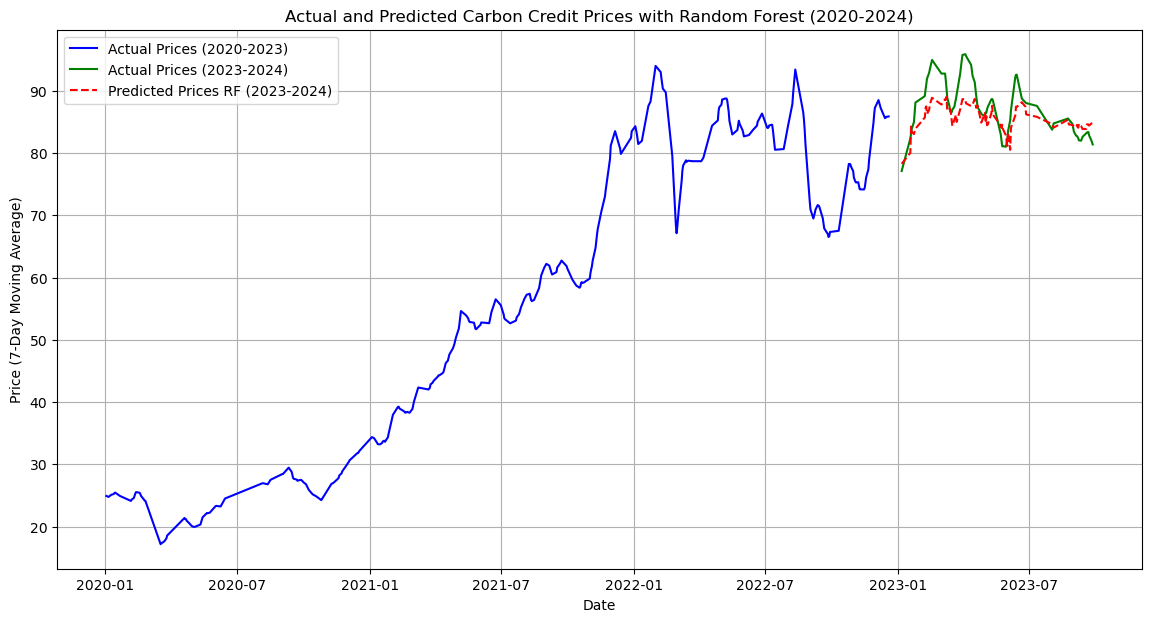

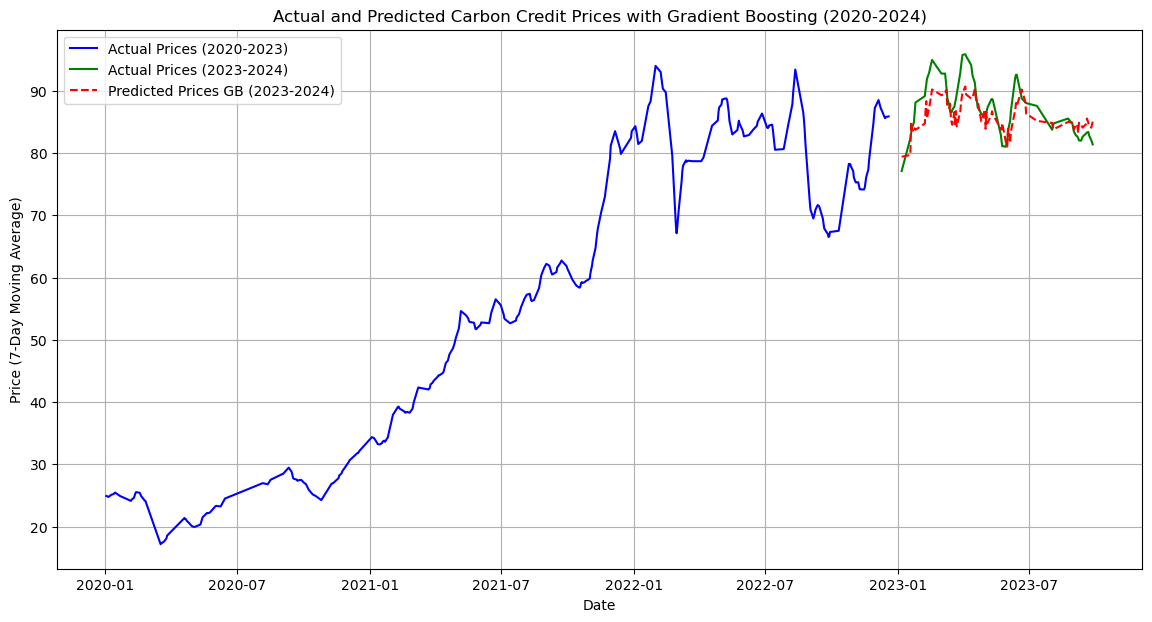

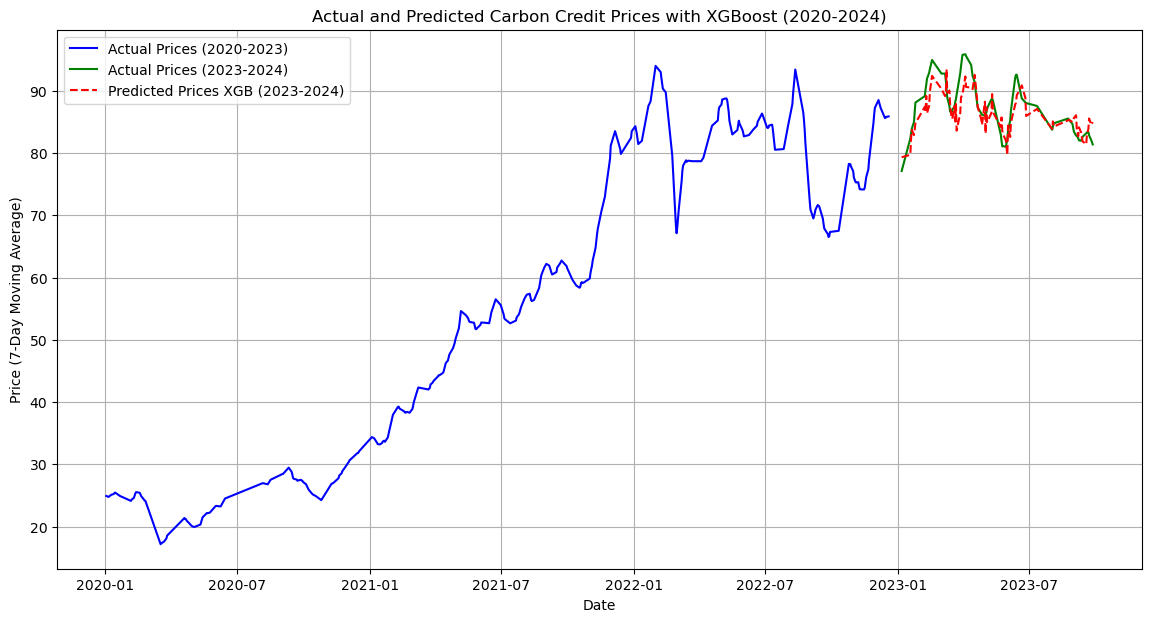

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


# Define the features and target variable
features = [ 'Open', 'Low', 'High', 'DailyChange', 'Sentiment']
target = 'Price_MA_7'

# Split the data into features (X) and target (y)
X = merged_data[features]
y = merged_data[target]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models with regularization parameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)

# Train the models
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the models
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the results
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}, R-squared: {r2_rf:.2f}")
print(f"Gradient Boosting - Mean Squared Error: {mse_gb:.2f}, R-squared: {r2_gb:.2f}")
print(f"XGBoost - Mean Squared Error: {mse_xgb:.2f}, R-squared: {r2_xgb:.2f}")

# Plot Random Forest Results
plt.figure(figsize=(14, 7))

# Plot actual prices for the first 80% (training data)
plt.plot(merged_data['Date'][:len(y_train)], y_train, label='Actual Prices (2020-2023)', color='blue', linewidth=1.5)

# Plot actual prices for the last 20% (test data)
plt.plot(merged_data['Date'][len(y_train):], y_test, label='Actual Prices (2023-2024)', color='green', linewidth=1.5)

# Plot predicted prices for the last 20% (test data)
plt.plot(merged_data['Date'][len(y_train):], y_pred_rf, label='Predicted Prices RF (2023-2024)', color='red', linestyle='--', linewidth=1.5)

plt.title('Actual and Predicted Carbon Credit Prices with Random Forest (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Gradient Boosting Results
plt.figure(figsize=(14, 7))

# Plot actual prices for the first 80% (training data)
plt.plot(merged_data['Date'][:len(y_train)], y_train, label='Actual Prices (2020-2023)', color='blue', linewidth=1.5)

# Plot actual prices for the last 20% (test data)
plt.plot(merged_data['Date'][len(y_train):], y_test, label='Actual Prices (2023-2024)', color='green', linewidth=1.5)

# Plot predicted prices for the last 20% (test data)
plt.plot(merged_data['Date'][len(y_train):], y_pred_gb, label='Predicted Prices GB (2023-2024)', color='red', linestyle='--', linewidth=1.5)

plt.title('Actual and Predicted Carbon Credit Prices with Gradient Boosting (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()

# Plot XGBoost Results
plt.figure(figsize=(14, 7))

# Plot actual prices for the first 80% (training data)
plt.plot(merged_data['Date'][:len(y_train)], y_train, label='Actual Prices (2020-2023)', color='blue', linewidth=1.5)

# Plot actual prices for the last 20% (test data)
plt.plot(merged_data['Date'][len(y_train):], y_test, label='Actual Prices (2023-2024)', color='green', linewidth=1.5)

# Plot predicted prices for the last 20% (test data)
plt.plot(merged_data['Date'][len(y_train):], y_pred_xgb, label='Predicted Prices XGB (2023-2024)', color='red', linestyle='--', linewidth=1.5)

plt.title('Actual and Predicted Carbon Credit Prices with XGBoost (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()